In [1]:
import pandas as pd
import pm4py
import joblib

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [3]:
import shap
from SHAP_utils import calculateSHAP_values, getMostAbsoluteImportantFeatures 

In [4]:
original_log=pm4py.read_xes("./Data/road_traffic/RawData/Road_Traffic_Fine_Management_Process.xes")

ISO8601 strings are not fully supported with strpfromiso for Python versions below 3.11
parsing log, completed traces :: 100%|██████████| 150370/150370 [00:42<00:00, 3499.09it/s]


In [5]:
route="07-21-2025_13-15-50"
clf=joblib.load("./results/Ours/"+route+"/clf_val_0.2.joblib")

In [6]:
dataset=pd.read_csv("./Data/road_traffic/mined_rtfm_relabelled_confidences.csv",index_col=0)

In [7]:
dataset=dataset.set_index("case:concept:name")

In [8]:
X=dataset.drop(columns=["Class"])

y=dataset['Class']
print("No. of features:"+str(len(X.columns)))

le = LabelEncoder()
print("Is na? "+str(X.isnull().values.any()))
y_transformed = le.fit_transform(y)
le_name_mapping = pd.Series(dict(zip(le.classes_,le.transform(le.classes_))))
cols=X.columns.to_list()
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y_transformed,
                                                    test_size=0.2,
                                                    stratify=y_transformed,
                                                    shuffle=True,
                                                    random_state=0)

No. of features:2189
Is na? True


In [9]:
shap_values_test, explainer_test=calculateSHAP_values(clf, X_test)

In [10]:
y=dataset["Class"]
X=dataset.drop(columns=["Class"])

In [11]:
def returnProbs(instanceClassX, instanceClassY, classifier, classX, classY):
    probsInstanceX=classifier.predict_proba(instanceClassX)
    probsInstanceX=probsInstanceX[0]*100
    print("Probabilities boundary trace of class "+classX+":")
    print("Class collected:"+str(round(probsInstanceX[0],5) )+";"+"Class dismissed:"+str(round(probsInstanceX[1],5))+ ";"+"Class fully paid:"+str(round(probsInstanceX[2],5))+ ";"+"Class Unresolved:"+str(round(probsInstanceX[3],5)) )
    probsInstanceY=classifier.predict_proba(instanceClassY)
    probsInstanceY=probsInstanceY[0]*100
    print("Probabilities boundary trace of class "+classY+":")
    print("Class collected:"+str(round(probsInstanceY[0],5) )+";"+"Class dismissed:"+str(round(probsInstanceY[1],5))+ ";"+"Class fully paid:"+str(round(probsInstanceY[2],5))+ ";"+"Class Unresolved:"+str(round(probsInstanceY[3],5)) )

In [ ]:
# 0-1-> collected vs dismissed

In [13]:
declare_measurements_boundary_cases0and1=pd.read_csv("./results/Ours/"+route+"/boundaryCases_Classes0-1.csv")

In [14]:
dataset.loc[declare_measurements_boundary_cases0and1["case:concept:name"]][["Class"]]

,Class
case:concept:name,
V4292,credit_collection
S88125,dismissed


In [15]:
class0="collected"
class1="dismissed"

instanceClassCollected=X.loc[["V4292"]]
instanceClassDismissed=X.loc[["S88125"]]
returnProbs(instanceClassCollected, instanceClassDismissed, clf, "collected", "dismissed")

Probabilities boundary trace of class collected:
Class collected:99.99162;Class dismissed:0.00737;Class fully paid:0.00019;Class Unresolved:0.00083
Probabilities boundary trace of class dismissed:
Class collected:0.00603;Class dismissed:58.317;Class fully paid:0.02242;Class Unresolved:41.65455


In [16]:
#In none of the supposed boundary cases, there is closeness between collected probs and dismissed probs, therefore they are not boundary traces

In [17]:
#0-2->collected vs fully paid

In [18]:
declare_measurements_boundary_cases0and2=pd.read_csv("./results/Ours/"+route+"/boundaryCases_Classes0-2.csv")

In [19]:
dataset.loc[declare_measurements_boundary_cases0and2["case:concept:name"]][["Class"]]

,Class
case:concept:name,
S159191,credit_collection
S138644,paid_full


In [20]:
class0="collected"
class2="paid full"

instanceClassCollected=X.loc[["S159191"]]
instanceClassPaid=X.loc[["S138644"]]
returnProbs(instanceClassCollected, instanceClassPaid, clf, class0, class2)

Probabilities boundary trace of class collected:
Class collected:99.99326;Class dismissed:1e-05;Class fully paid:0.006;Class Unresolved:0.00072
Probabilities boundary trace of class paid full:
Class collected:0.00163;Class dismissed:0.00108;Class fully paid:67.9014;Class Unresolved:32.0959


In [21]:
#In none of the supposed boundary cases, there is closeness between collected probs and paid full probs, therefore they are not boundary traces

In [22]:
#0-3->collected vs fully paid

In [23]:
declare_measurements_boundary_cases0and3=pd.read_csv("./results/Ours/"+route+"/boundaryCases_Classes0-3.csv")

In [24]:
dataset.loc[declare_measurements_boundary_cases0and3["case:concept:name"]][["Class"]]

,Class
case:concept:name,
S145804,credit_collection
S98111,unresolved


In [25]:
class0="collected"
class3="unresolved"

instanceClassCollected=X.loc[["S145804"]]
instanceClassUnresolved=X.loc[["S98111"]]
returnProbs(instanceClassCollected, instanceClassUnresolved, clf, class0, class3)

Probabilities boundary trace of class collected:
Class collected:99.99086;Class dismissed:0.00788;Class fully paid:0.00046;Class Unresolved:0.00081
Probabilities boundary trace of class unresolved:
Class collected:0.00123;Class dismissed:1.05841;Class fully paid:49.1696;Class Unresolved:49.77076


In [26]:
#In none of the supposed boundary cases, there is closeness between collected probs and unresolved probs, therefore they are not boundary traces

In [27]:
# 1-2-> dismissed vs paid full

In [28]:
declare_measurements_boundary_cases1and2=pd.read_csv("./results/Ours/"+route+"/boundaryCases_Classes1-2.csv")

In [29]:
dataset.loc[declare_measurements_boundary_cases1and2["case:concept:name"]][["Class"]]

,Class
case:concept:name,
S88125,dismissed
V8248,paid_full


In [30]:
class1="Dismissed"
class2="Fully paid"

instanceClassDismissed=X.loc[["S88125"]]
instanceClassPaid=X.loc[["V8248"]]
returnProbs(instanceClassCollected, instanceClassPaid, clf, class1, class2)

Probabilities boundary trace of class Dismissed:
Class collected:99.99086;Class dismissed:0.00788;Class fully paid:0.00046;Class Unresolved:0.00081
Probabilities boundary trace of class Fully paid:
Class collected:0.00174;Class dismissed:0.03284;Class fully paid:52.06785;Class Unresolved:47.89757


In [31]:
#In none of the supposed boundary cases, there is closeness between dismissed probs and fully paid probs, therefore they are not boundary traces

In [43]:
#1-3->dismissed vs unresolved

In [33]:
declare_measurements_boundary_cases1and3=pd.read_csv("./results/Ours/"+route+"/boundaryCases_Classes1-3.csv")

In [34]:
declare_measurements_boundary_cases1and3

,case:concept:name,"'AlternateResponse(Send Appeal to Prefecture, Receive Result Appeal from Prefecture)'","'AlternateResponse(Send Fine, Receive Result Appeal from Prefecture)'","'ChainResponse(Send Appeal to Prefecture, Payment)'","'ChainPrecedence(Send Fine, Payment)'",'Absence(Notify Result Appeal to Offender)',"'ChainResponse(Notify Result Appeal to Offender, Appeal to Judge)'","'AlternateSuccession(Payment, Add penalty)'","'AlternateResponse(Send Fine, Appeal to Judge)'","'AlternatePrecedence(Send Fine, Insert Date Appeal to Prefecture)'",...,"'AlternateResponse(Insert Date Appeal to Prefecture, Receive Result Appeal from Prefecture)'","'ChainResponse(Insert Date Appeal to Prefecture, Receive Result Appeal from Prefecture)'","'AlternatePrecedence(Send Appeal to Prefecture, Payment)'","'ChainResponse(Insert Fine Notification, Insert Date Appeal to Prefecture)'","'AlternateResponse(Send Fine, Send for Credit Collection)'","'ChainResponse(Appeal to Judge, Send Appeal to Prefecture)'","'AlternatePrecedence(Payment, Send Appeal to Prefecture)'","'AlternateResponse(Receive Result Appeal from Prefecture, Notify Result Appeal to Offender)'",'End(Notify Result Appeal to Offender)',"'ChainResponse(Send Appeal to Prefecture, Notify Result Appeal to Offender)'"
0,S88125,0.0,0.0,0.0,-100.0,100.0,-100.0,0.0,0.0,100.0,...,0.0,0.0,-100.0,0.0,0.0,-100.0,0.0,-100.0,0.0,0.0
1,V8904,0.0,0.0,0.0,-100.0,100.0,-100.0,-100.0,0.0,0.0,...,0.0,0.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,0.0,0.0


In [35]:
dataset.loc[declare_measurements_boundary_cases1and3["case:concept:name"]][["Class"]]

,Class
case:concept:name,
S88125,dismissed
V8904,unresolved


In [36]:
class1="Dismissed"
class3="Unresolved"

instanceClassDismissed=X.loc[["S88125"]]
instanceClassUnresolved=X.loc[["V8904"]]
returnProbs(instanceClassDismissed, instanceClassUnresolved, clf, class1, class3)

Probabilities boundary trace of class Dismissed:
Class collected:0.00603;Class dismissed:58.317;Class fully paid:0.02242;Class Unresolved:41.65455
Probabilities boundary trace of class Unresolved:
Class collected:0.00649;Class dismissed:30.92578;Class fully paid:0.02414;Class Unresolved:69.04358


In [37]:
def plotTop10features(shap_values, case, X, classCase, explainer):
    index_instance_class=X.index.get_indexer([case])[0]
    shap_values_best_instance=shap_values[classCase][index_instance_class]
    expected_value=explainer.expected_value[classCase]#expected value of the class
    class_instance_all_values=X.loc[case]
    shap.waterfall_plot(shap.Explanation(values=shap_values_best_instance, 
                                     base_values=expected_value, 
                                     data=class_instance_all_values),
                                     max_display=10,
                                     show=True)

In [38]:
explainer_test.expected_value

[-2.5353987, -1.8503346, 1.3371118, 0.41149622]

In [39]:
original_log[original_log["case:concept:name"]=="S88125"]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
516599,33.60,843,NIL,Create Fine,A,0.0,complete,2003-08-07 00:00:00+00:00,158.0,0.0,S88125,NaN,NaN,NaN,NaN,NaN
516600,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2003-11-03 00:00:00+00:00,NaN,NaN,S88125,10.0,NaN,NaN,NaN,NaN
516601,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2003-11-13 00:00:00+00:00,NaN,NaN,S88125,NaN,P,N,NaN,NaN
516602,68.77,NaN,NaN,Add penalty,NaN,NaN,complete,2004-01-12 00:00:00+00:00,NaN,NaN,S88125,NaN,NaN,NaN,NaN,NaN
516603,NaN,NaN,NaN,Insert Date Appeal to Prefecture,NaN,NaN,complete,2004-01-12 00:00:00+00:00,NaN,NaN,S88125,NaN,NaN,NaN,NaN,NaN
516604,NaN,NaN,#,Send Appeal to Prefecture,NaN,NaN,complete,2004-02-12 00:00:00+00:00,NaN,NaN,S88125,NaN,NaN,NaN,NaN,NaN


In [40]:
original_log[original_log["case:concept:name"]=="V8904"]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
558724,131.0,11,NIL,Create Fine,A,0.0,complete,2002-05-02 00:00:00+00:00,142.0,0.0,V8904,NaN,NaN,NaN,NaN,NaN
558725,NaN,NaN,NaN,Insert Date Appeal to Prefecture,NaN,NaN,complete,2002-07-29 00:00:00+00:00,NaN,NaN,V8904,NaN,NaN,NaN,NaN,NaN
558726,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2002-07-29 00:00:00+00:00,NaN,NaN,V8904,10.0,NaN,NaN,NaN,NaN
558727,NaN,NaN,NIL,Send Appeal to Prefecture,NaN,NaN,complete,2002-07-30 00:00:00+00:00,NaN,NaN,V8904,NaN,NaN,NaN,NaN,NaN


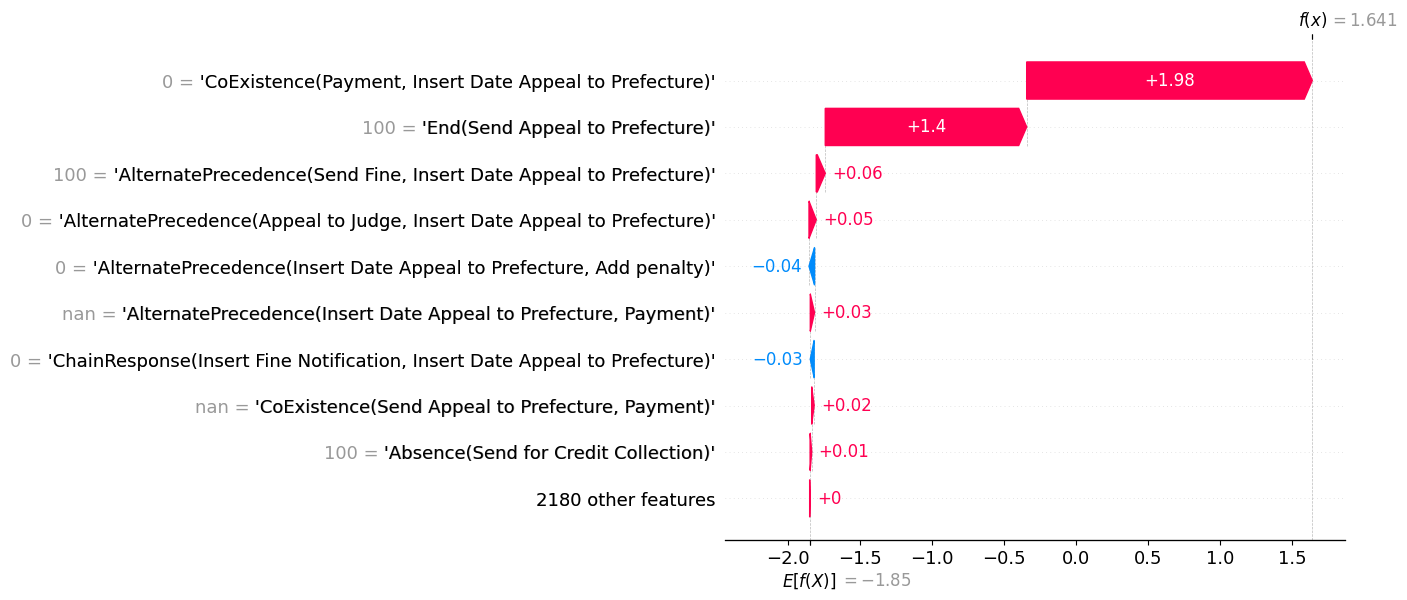

In [41]:
plotTop10features(shap_values=shap_values_test,
                  case="S88125",
                  classCase=1, 
                  X=X_test,
                  explainer=explainer_test)

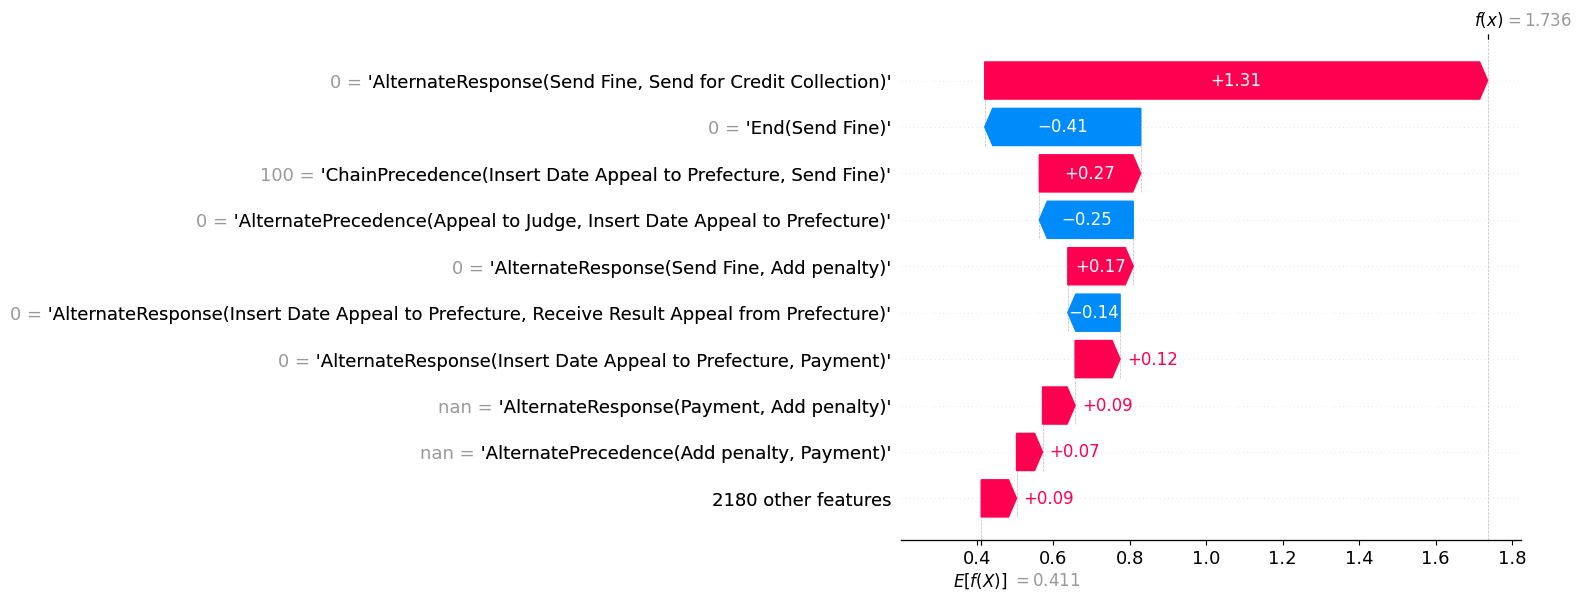

In [42]:
plotTop10features(shap_values=shap_values_test,
                  case="V8904",
                  classCase=3, 
                  X=X_test,
                  explainer=explainer_test)

In [43]:
#2-3-> paid full vs unresolved

In [44]:
declare_measurements_boundary_cases2and3=pd.read_csv("./results/Ours/"+route+"/boundaryCases_Classes2-3.csv")

In [45]:
dataset.loc[declare_measurements_boundary_cases2and3["case:concept:name"]][["Class"]]

,Class
case:concept:name,
S93920,paid_full
N55182,unresolved


In [46]:
class2="Full paid"
class3="Unresolved"

instanceClassFullPaid=X.loc[["S93920"]]
instanceClassUnresolved=X.loc[["N55182"]]
returnProbs(instanceClassFullPaid, instanceClassUnresolved, clf, class2, class3)

Probabilities boundary trace of class Full paid:
Class collected:0.00233;Class dismissed:0.00789;Class fully paid:73.2518;Class Unresolved:26.738
Probabilities boundary trace of class Unresolved:
Class collected:0.00226;Class dismissed:0.03076;Class fully paid:47.7992;Class Unresolved:52.16778


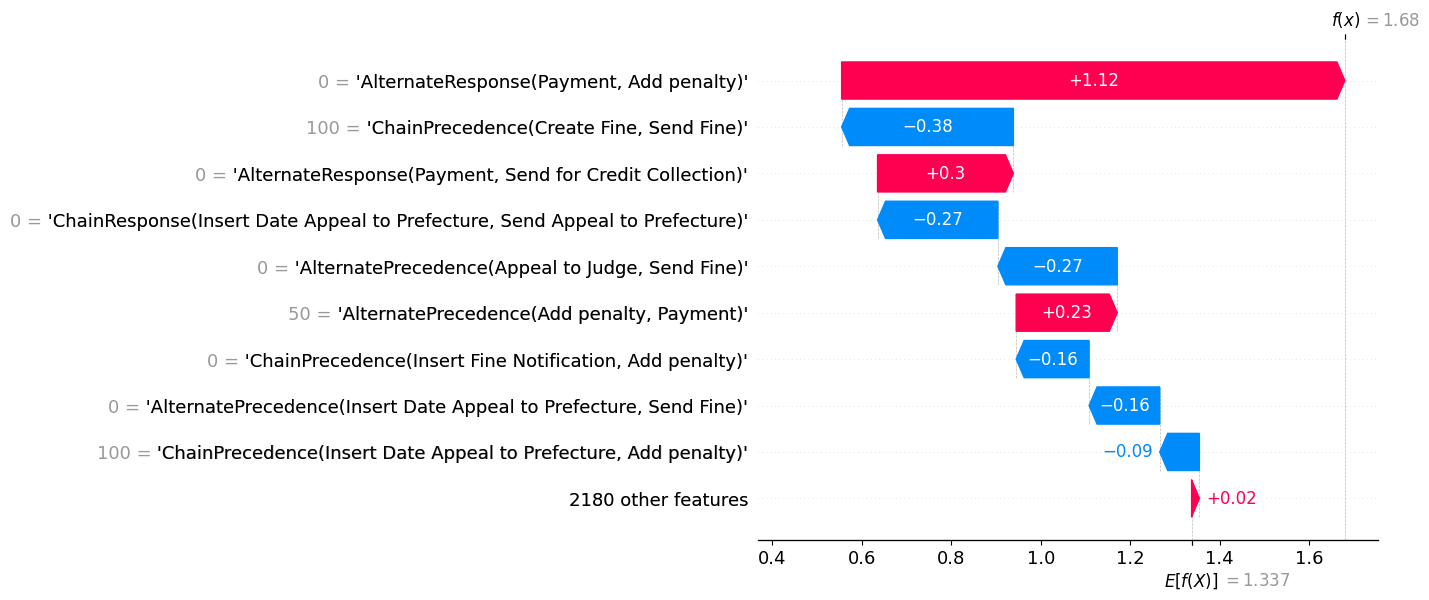

In [28]:
plotTop10features(shap_values=shap_values_test,
                  case="S93920",
                  classCase=2, 
                  X=X_test,
                  explainer=explainer_test)

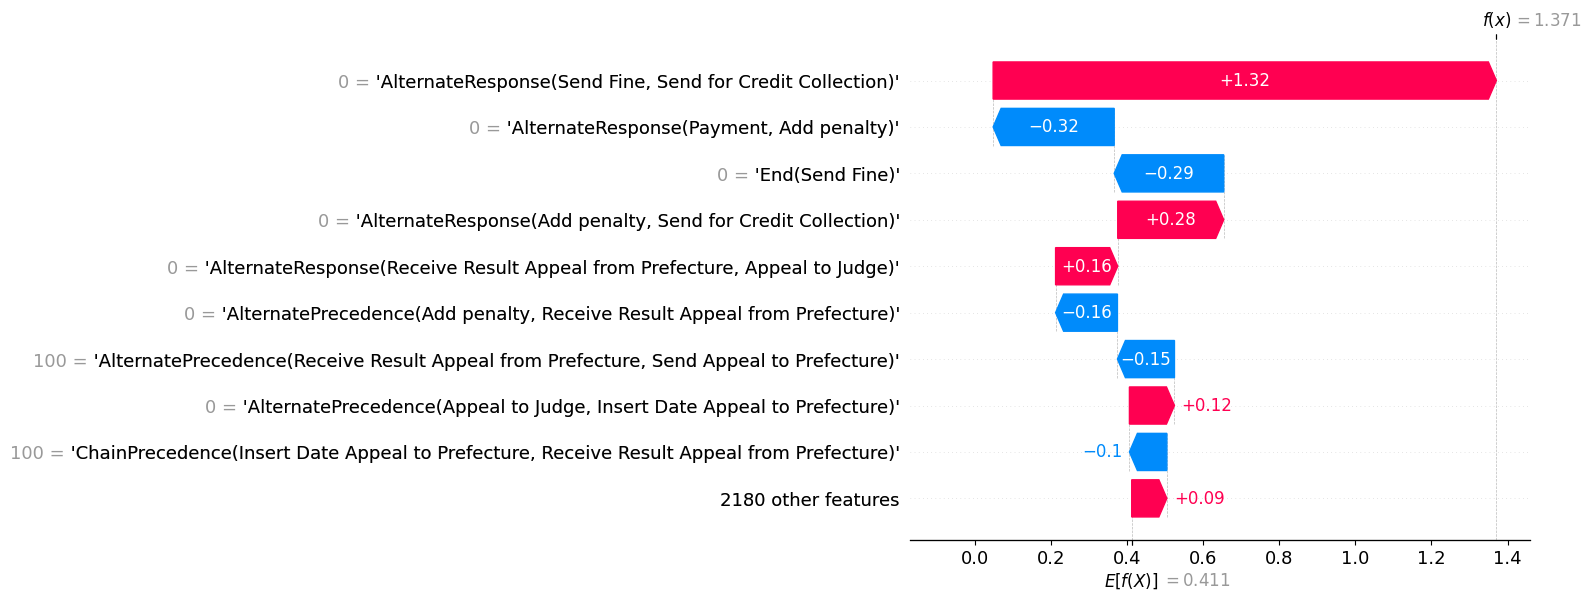

In [29]:
plotTop10features(shap_values=shap_values_test,
                  case="N55182",
                  classCase=3, 
                  X=X_test,
                  explainer=explainer_test)

In [13]:
original_log[original_log["case:concept:name"]=="N55182"]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
186524,33.60,537,NIL,Create Fine,A,0.0,complete,2004-06-29 00:00:00+00:00,157.0,0.0,N55182,NaN,NaN,NaN,NaN,NaN
186525,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2004-11-22 00:00:00+00:00,NaN,NaN,N55182,16.0,NaN,NaN,NaN,NaN
186526,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2004-12-01 00:00:00+00:00,NaN,NaN,N55182,NaN,P,P,NaN,NaN
186527,NaN,NaN,NaN,Insert Date Appeal to Prefecture,NaN,NaN,complete,2004-12-07 00:00:00+00:00,NaN,NaN,N55182,NaN,NaN,NaN,NaN,NaN
186528,NaN,NaN,NaN,Receive Result Appeal from Prefecture,NaN,NaN,complete,2005-01-14 00:00:00+00:00,NaN,NaN,N55182,NaN,NaN,NaN,NaN,NaN
186529,NaN,NaN,NIL,Send Appeal to Prefecture,NaN,NaN,complete,2005-01-14 00:00:00+00:00,NaN,NaN,N55182,NaN,NaN,NaN,NaN,NaN
186530,68.77,NaN,NaN,Add penalty,NaN,NaN,complete,2005-01-30 00:00:00+00:00,NaN,NaN,N55182,NaN,NaN,NaN,NaN,NaN
186531,NaN,NaN,NaN,Notify Result Appeal to Offender,NaN,NaN,complete,2005-03-18 00:00:00+00:00,NaN,NaN,N55182,NaN,NaN,NaN,NaN,NaN
186532,NaN,NaN,NaN,Payment,NaN,83.2,complete,2005-03-25 00:00:00+00:00,NaN,NaN,N55182,NaN,NaN,NaN,83.2,NaN


In [47]:
original_log[original_log["case:concept:name"]=="S93920"]

,amount,org:resource,dismissal,concept:name,vehicleClass,totalPaymentAmount,lifecycle:transition,time:timestamp,article,points,case:concept:name,expense,notificationType,lastSent,paymentAmount,matricola
523387,68.25,48,NIL,Create Fine,A,0.0,complete,2004-06-29 00:00:00+00:00,158.0,0.0,S93920,NaN,NaN,NaN,NaN,NaN
523388,NaN,NaN,NaN,Send Fine,NaN,NaN,complete,2004-11-22 00:00:00+00:00,NaN,NaN,S93920,16.0,NaN,NaN,NaN,NaN
523389,NaN,NaN,NaN,Insert Fine Notification,NaN,NaN,complete,2004-11-29 00:00:00+00:00,NaN,NaN,S93920,NaN,P,P,NaN,NaN
523390,NaN,NaN,NaN,Insert Date Appeal to Prefecture,NaN,NaN,complete,2005-01-17 00:00:00+00:00,NaN,NaN,S93920,NaN,NaN,NaN,NaN,NaN
523391,137.55,NaN,NaN,Add penalty,NaN,NaN,complete,2005-01-28 00:00:00+00:00,NaN,NaN,S93920,NaN,NaN,NaN,NaN,NaN
523392,NaN,NaN,NIL,Send Appeal to Prefecture,NaN,NaN,complete,2005-02-21 00:00:00+00:00,NaN,NaN,S93920,NaN,NaN,NaN,NaN,NaN
523393,NaN,NaN,NaN,Receive Result Appeal from Prefecture,NaN,NaN,complete,2005-04-08 00:00:00+00:00,NaN,NaN,S93920,NaN,NaN,NaN,NaN,NaN
523394,NaN,NaN,NaN,Notify Result Appeal to Offender,NaN,NaN,complete,2005-05-12 00:00:00+00:00,NaN,NaN,S93920,NaN,NaN,NaN,NaN,NaN
523395,NaN,NaN,NaN,Payment,NaN,136.5,complete,2005-06-09 00:00:00+00:00,NaN,NaN,S93920,NaN,NaN,NaN,136.5,NaN
523396,NaN,NaN,NaN,Payment,NaN,156.5,complete,2005-07-11 00:00:00+00:00,NaN,NaN,S93920,NaN,NaN,NaN,20.0,NaN
